<a href="https://colab.research.google.com/github/gerges87/Real-Time-sentimet-Analyzer-And-Reporter/blob/main/Drugs_A%2C_B%2C_C%2C_X%2C_Y_for_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import tree

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pablomgomez21/drugs-a-b-c-x-y-for-decision-trees")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/drugs-a-b-c-x-y-for-decision-trees


In [ ]:
files=os.listdir(path)
print('files in dataset',files)

files in dataset ['drug200.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "drug200.csv"))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
display(df.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])

In [ ]:
# Separate features (X) and target (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

Now, I will convert the categorical features ('Sex', 'BP', 'Cholesterol') into numerical representations using one-hot encoding.

In [ ]:
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
display(X.head())

,Age,Na_to_K,Sex_1,BP_1,BP_2,Cholesterol_1
0,23,25.355,False,False,False,False
1,47,13.093,True,True,False,False
2,47,10.114,True,True,False,False
3,28,7.798,False,False,True,False
4,61,18.043,False,True,False,False


Finally, I will fit the Decision Tree Classifier using the prepared features and target variable.

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

print("Decision Tree Classifier fitted successfully.")

Decision Tree Classifier fitted successfully.


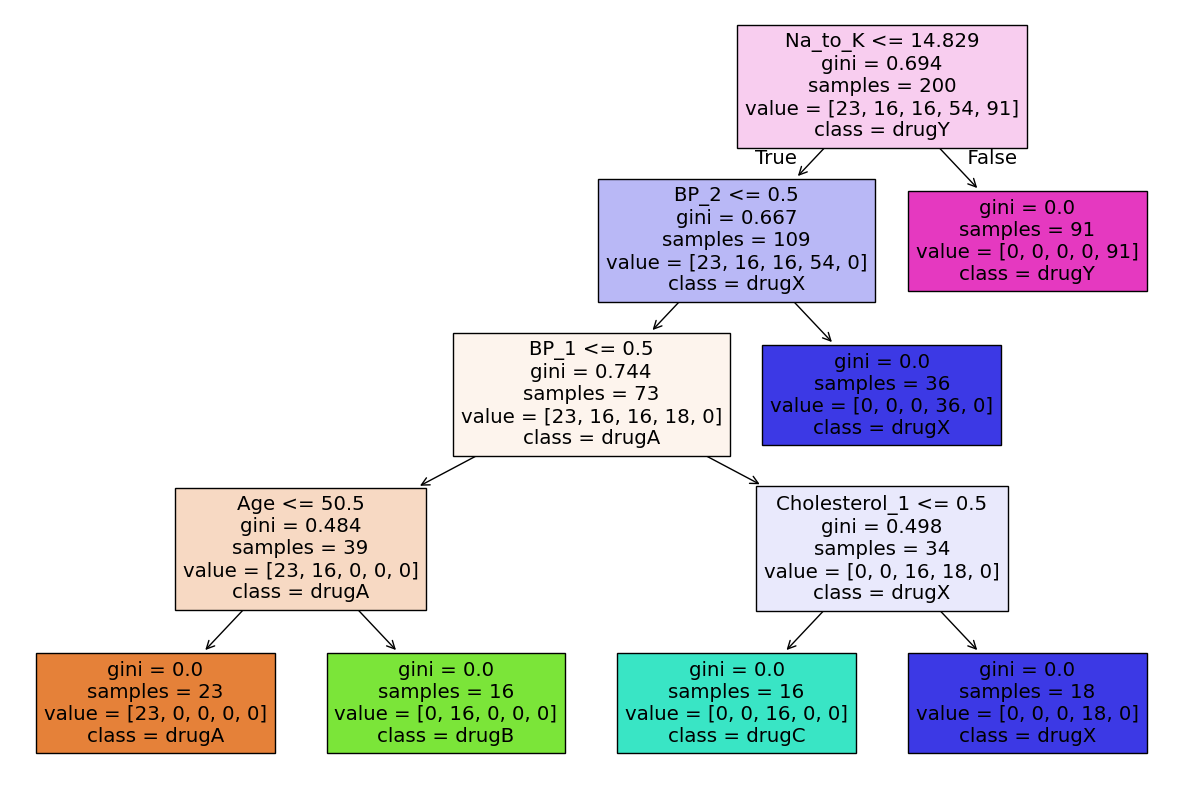

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the feature names from the DataFrame X after one-hot encoding
feature_names = X.columns.tolist()
class_names = [str(c) for c in clf.classes_]

plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 1.0000
